In [1]:
import pandas as pd
import numpy as np
import sklearn as sk
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn import linear_model
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
#from sensitivity_plot import sensitivity_plot
#import statsmodels.api as sm
import numbers
from sklearn.metrics import mean_squared_error
import math
from sklearn.svm import SVR
from sklearn import linear_model
from sklearn.neural_network import MLPRegressor
import pylab 
import scipy.stats as stats
from sklearn.model_selection import cross_val_score
from sklearn.ensemble.partial_dependence import partial_dependence, plot_partial_dependence

In [2]:
import os
import sys
module_path = os.path.abspath(r'C:\Git\WhiteBox_Production')
if module_path not in sys.path:
    sys.path.append(module_path)
    
from whitebox.eval import WhiteBoxSensitivity

In [3]:
df = pd.read_csv('./datasets/final_data.csv', low_memory=False)
#final_data = final_data.drop('LanguageRecommendationSelect', axis=1)

In [4]:
#for details on data cleaning see'Data_Cleaning.ipynb'
#raw data has 5617 rows
df.shape

(5617, 282)

In [5]:
#get rid of all NAs
#final_data = final_data.dropna()
df = df.reset_index(drop=True)
df.shape

(5617, 282)

In [6]:
#'Average Salary Within Country' : 'Average Salary Within Country',  
featuredict = { 'WorkChallengeFrequencyPolitics' : 'Frequency of Political Work Issues', 
               'WorkDataVisualizations' : 'Percent of Work Making Visuals',
               'MLToolNextYearSelect' : 'Machine Learning Tool I Plan to Learn Next',
                             'TimeModelBuilding' : 'Time Spent Model Building',
                             'Number of Algorithims' : 'Number of Algorithms',
                             'SalaryChange' : 'Salary Change',
                             'EmployerSizeChange' : 'YoY Change in Employer Size',
                             'Percent Above/Below Average Salary' : 'Percent Above/Below Average Salary',              
                             'LearningCategoryWork' : 'Proportion of Knowledge Gained From Work',
                             'LearningCategoryOnlineCourses': 'Proportion of Knowledge Gained Online',
                             'LearningPlatformUsefulnessCompany' : 'Usefulness of Firm Learning Platform',
                             'WorkChallengeFrequencyDomainExpertise' : 'Frequency of Personally Lacking Domain Expertise',
                             'WorkChallengeFrequencyTalent' : 'Challenge in finding talent',
               'WorkChallengeFrequencyML' : 'Work Challenge - Machine Learning',
                             'RemoteWork' : 'Remote Work',
                             'Age' : 'Age',
                             'TitleFit' : 'Title Fit',
                                     'DataScienceIdentitySelect' : 'Data Scientist Identity',
             
                             'Continent' : 'Continent',
                             'SalaryChange' : 'YoY Salary Change',
                             'JobSatisfaction' : 'Job Satisfaction',
                             'AlgorithmUnderstandingLevel' : 'Algorithm Understanding Level',
                              'UniversityImportance' : 'Importance of Attending a University',
               'Entire_Population' : 'Entire Population'
                         }

rev = {v: k for k, v in featuredict.items()}

df.rename(columns=featuredict, inplace=True)

In [7]:
dependentVar = featuredict.get('JobSatisfaction', 'JobSatisfaction')

In [8]:
#these are too sparse so removing them actually makes the model slightly better
spike_cols = [col for col in df.columns if 'WorkToolsSelect' in col]
df = df.drop(spike_cols, axis=1)
spike_cols = [col for col in df.columns if 'WorkHardwareSelect' in col]
df = df.drop(spike_cols, axis=1)

#drop country specific axis as it's hard to interpret and clouds the impact of other variables
df= df.drop('Average Salary Within Country', axis=1)

In [9]:
#drop people who don't consider themselves Data Scientists

df = df[df[featuredict['DataScienceIdentitySelect']] !='No']
df.shape

(4364, 221)

In [10]:
df[dependentVar].describe()

count    4364.000000
mean        6.880614
std         2.108277
min         1.000000
25%         6.000000
50%         7.000000
75%         8.000000
max        10.000000
Name: Job Satisfaction, dtype: float64

In [11]:
#drop columns with WorkToolsSelect_C as they are sparse and not important here and have a ++ that is problematic
df[featuredict['JobSatisfaction']].quantile([.1,.2,.3,.4,.5,.6,.7,.8,.9])

0.1    4.0
0.2    5.0
0.3    6.0
0.4    7.0
0.5    7.0
0.6    8.0
0.7    8.0
0.8    9.0
0.9    9.0
Name: Job Satisfaction, dtype: float64

In [12]:

#convert string variables to categorical variables 
#df[df.select_dtypes(['object']).columns] = df.select_dtypes(['object']).apply(lambda x: x.astype('category'))

# select only those columns which are categorical in nature and make a copy for modeling
#df.select_dtypes(include = ['object'])
finaldf = df.copy(deep = True)

# create dummies example using all categorical columns
# this naming convention must be precise for WhiteBox to recognize what dummies are associated with what variables
#dummies = pd.concat([pd.get_dummies(model_df.loc[:, col], prefix = col) for col in model_df.select_dtypes(include = ['object']).columns], axis = 1)

finaldf = pd.concat([pd.get_dummies(finaldf.loc[:, finaldf.columns != dependentVar].select_dtypes(include=['category', 'O'])),
           finaldf.select_dtypes(include=[np.number])], axis=1)

# add the dummies to the numeric dataframe for modeling
#model_df = pd.concat([model_df.select_dtypes(include = [np.number]), dummies], axis = 1)


In [13]:
#make train and test samles
X_train, X_test, y_train, y_test = train_test_split(finaldf.loc[:, finaldf.columns != dependentVar], df.loc[:, dependentVar], test_size=0.1, random_state=42)

In [14]:
#make a Random Forest object trained to predict Job Satisfaction 
#Rf = RandomForestRegressor(n_estimators=50, min_weight_fraction_leaf = .01,  oob_score=True)
#Rf.fit(xTrain,final_data['JobSatisfaction'])
#Rf.fit(finaldf.loc[:, finaldf.columns != dependentVar],df.loc[:, dependentVar])



In [15]:
#scores = cross_val_score(Rf, finaldf.loc[:, finaldf.columns != dependentVar], df.loc[:, dependentVar], cv=5)
#print(scores)
#print(scores.mean())

In [16]:
est = GradientBoostingRegressor(n_estimators=200, learning_rate=.05,  min_weight_fraction_leaf = .01, loss='ls', random_state = 25)
est.fit(finaldf.loc[:, finaldf.columns != dependentVar], finaldf.loc[:, dependentVar])

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.05, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.01,
             n_estimators=200, presort='auto', random_state=25,
             subsample=1.0, verbose=0, warm_start=False)

In [17]:
finaldf.shape

(4364, 1066)

In [18]:
scores = cross_val_score(est, finaldf.loc[:, finaldf.columns != dependentVar], finaldf.loc[:, dependentVar], cv=5)
print(scores)
print(scores.mean())

[0.18925893 0.18992717 0.21035423 0.21166745 0.1718822 ]
0.19461799567867424


In [19]:
#fit lasso model
lass = linear_model.Lasso(alpha=0.03)
lass.fit(finaldf.loc[:, finaldf.columns != dependentVar],df.loc[:, dependentVar])

Lasso(alpha=0.03, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [20]:
scores = cross_val_score(lass, finaldf.loc[:, finaldf.columns != dependentVar], df.loc[:, dependentVar], cv=5)
print(scores)
print(scores.mean())

[0.17855339 0.19955505 0.20235978 0.20088658 0.1630909 ]
0.18888914219697162


In [21]:
#generate coefficients and then print them
coef_dict = {}
for coef, feat in zip(lass.coef_,X_train.columns):
    if coef != 0:
        coef_dict[feat] = round(coef,3)

In [22]:
pd.DataFrame(list(coef_dict.items()), columns=['Varialbe', 'Coefficient']).sort_values(['Coefficient'])

,Varialbe,Coefficient
12,Frequency of Political Work Issues_Most of the...,-0.620
25,Continent_Asia,-0.458
2,Title Fit_Poorly,-0.396
24,YoY Salary Change_Has stayed about the same (h...,-0.286
22,Remote Work_Never,-0.216
16,Challenge in finding talent_Most of the time,-0.174
29,CurrentEmployerType_Employed by a company that...,-0.142
19,WorkChallengeFrequencyDataAccess_Never,-0.079
15,WorkChallengeFrequencyDirtyData_Never,-0.072
7,JobFunctionSelect_Analyze and understand data ...,-0.066


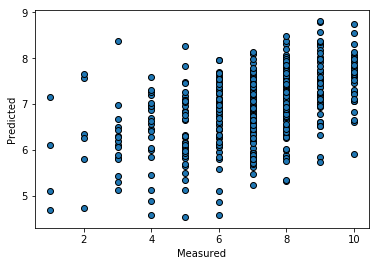

In [23]:
#test validity of assumptions of the regression's coefficients 
y = y_test
predicted = lass.predict(X_test)
fig, ax = plt.subplots()
ax.scatter(y, predicted, edgecolors=(0, 0, 0))
#ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=6)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

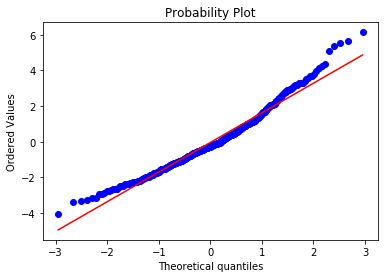

In [24]:
y = y_test
predicted = lass.predict(X_test)
error2 = (predicted-y_test)
stats.probplot(error2, dist="norm", plot=pylab)
pylab.show()

CurrentJobTitleSelect_Data Scientist


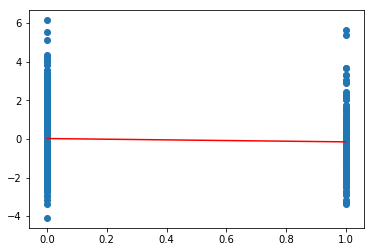

Title Fit_Perfectly


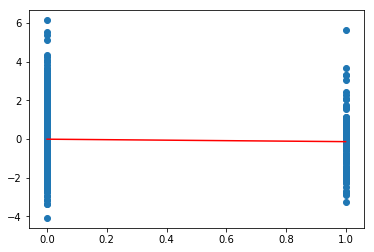

Title Fit_Poorly


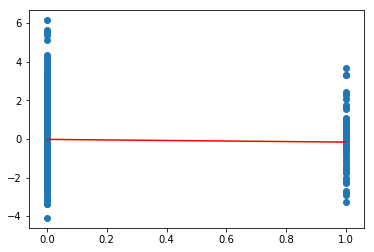

Data Scientist Identity_Sort of (Explain more)


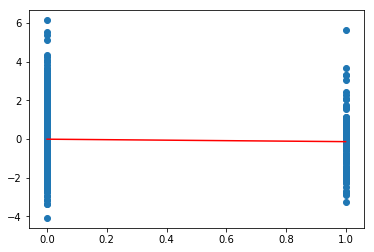

YoY Change in Employer Size_Increased significantly


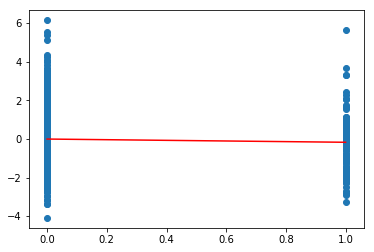

YoY Change in Employer Size_Increased slightly


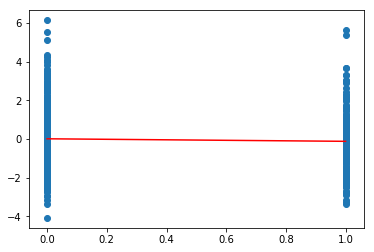

Importance of Attending a University_Very important


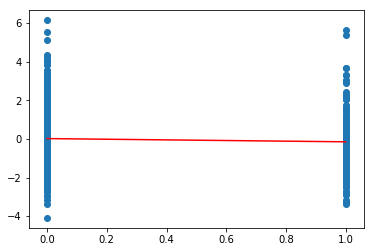

JobFunctionSelect_Analyze and understand data to influence product or business decisions


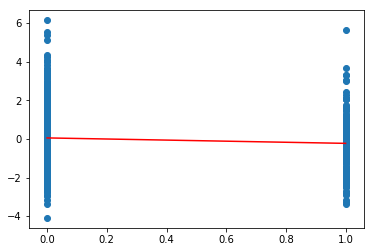

WorkToolsFrequencyJupyter_Most of the time


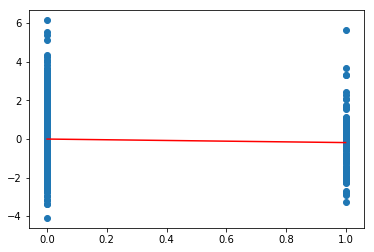

WorkToolsFrequencyJupyter_Never


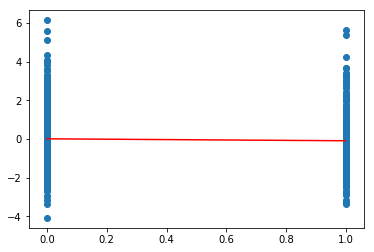

WorkMethodsFrequencyDataVisualization_Most of the time


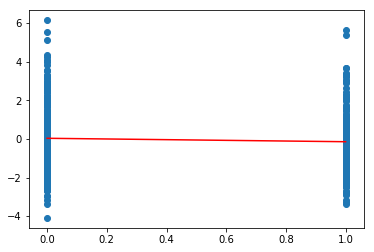

WorkMethodsFrequencyTextAnalysis_Never


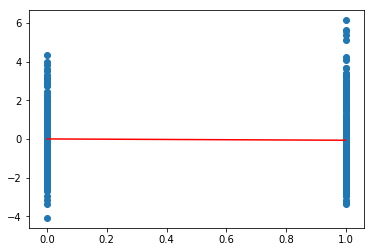

Frequency of Political Work Issues_Most of the time


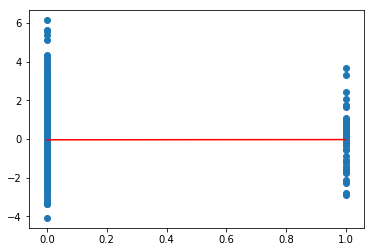

Frequency of Political Work Issues_Never


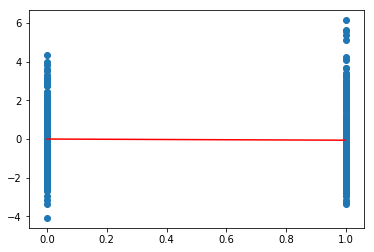

WorkChallengeFrequencyUnusedResults_Never


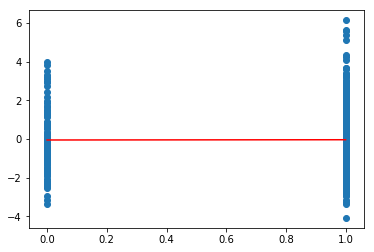

WorkChallengeFrequencyDirtyData_Never


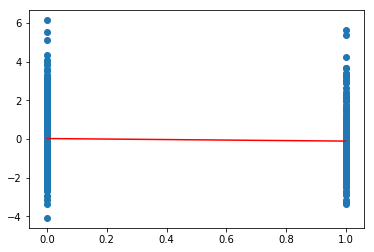

Challenge in finding talent_Most of the time


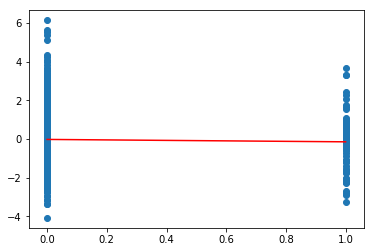

Challenge in finding talent_Never


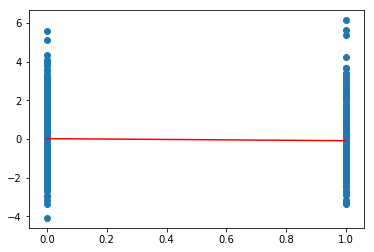

WorkChallengeFrequencyPrivacy_Never


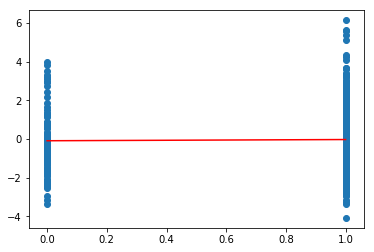

WorkChallengeFrequencyDataAccess_Never


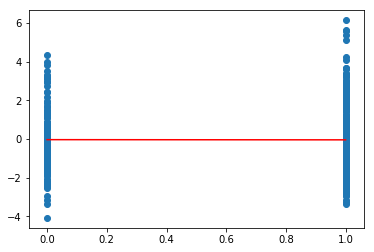

Percent of Work Making Visuals_10-25% of projects


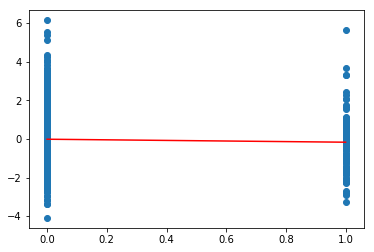

Percent of Work Making Visuals_Less than 10% of projects


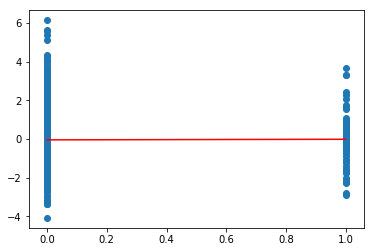

Remote Work_Never


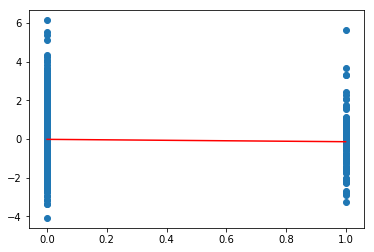

YoY Salary Change_Has increased 20% or more


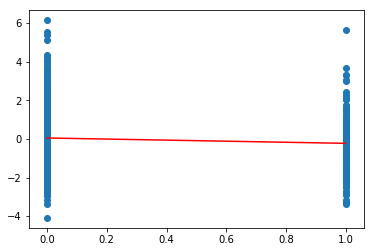

YoY Salary Change_Has stayed about the same (has not increased or decreased more than 5%)


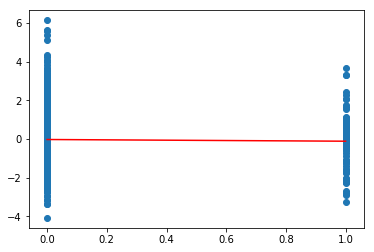

Continent_Asia


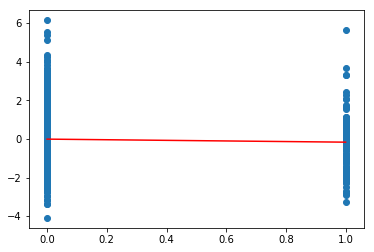

Continent_Other


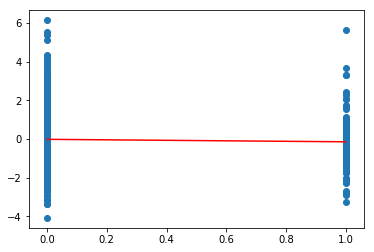

CurrentEmployerType_Employed by a company that doesn't perform advanced analytics_No


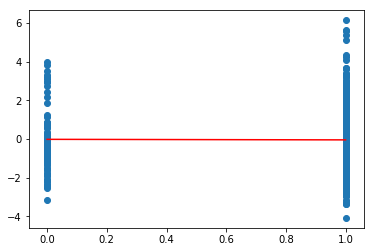

CurrentEmployerType_Employed by a company that doesn't perform advanced analytics_Yes


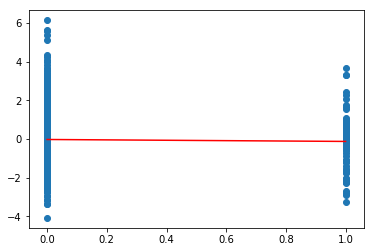

CurrentEmployerType_Employed by a company that performs advanced analytics_No


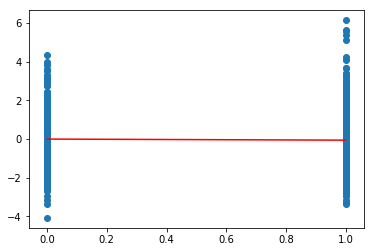

CurrentEmployerType_Employed by a company that performs advanced analytics_Yes


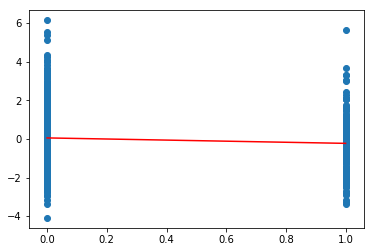

Age


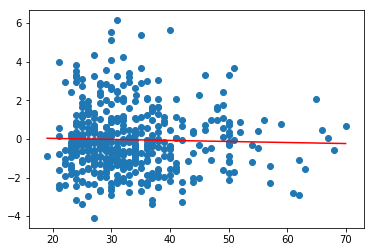

LearningCategorySelftTaught


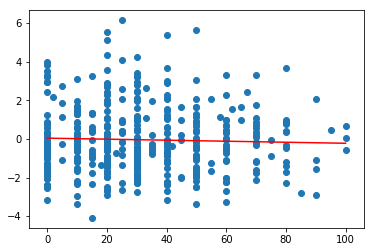

Proportion of Knowledge Gained Online


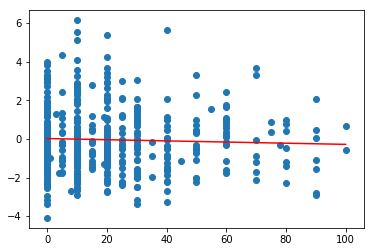

Proportion of Knowledge Gained From Work


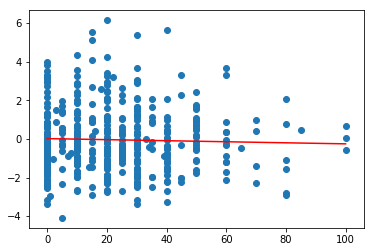

LearningCategoryUniversity


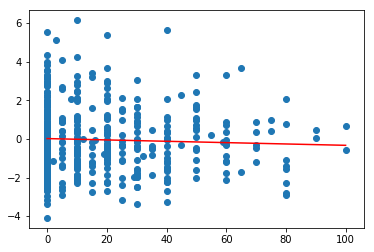

LearningCategoryKaggle


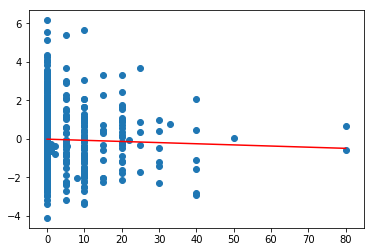

TimeGatheringData


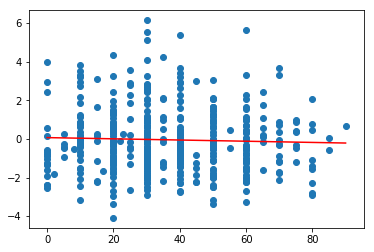

Time Spent Model Building


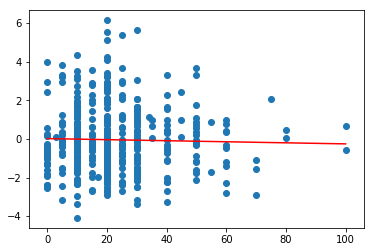

TimeProduction


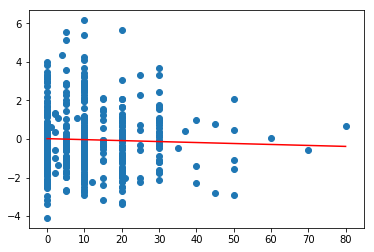

TimeVisualizing


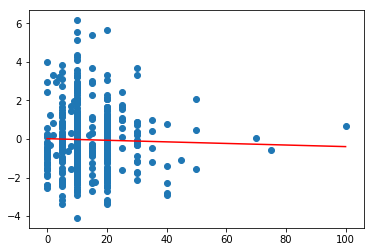

TimeFindingInsights


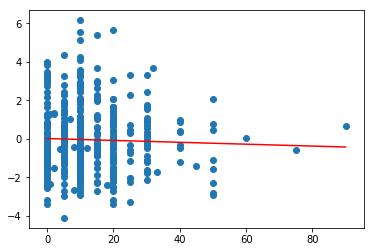

TimeOtherSelect


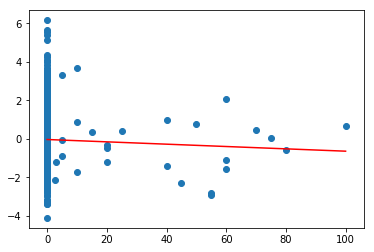

Unnamed: 0


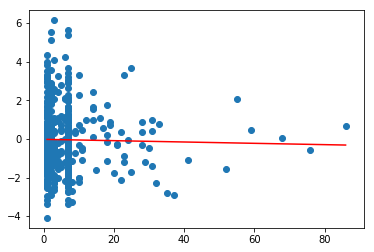

Percent Above/Below Average Salary


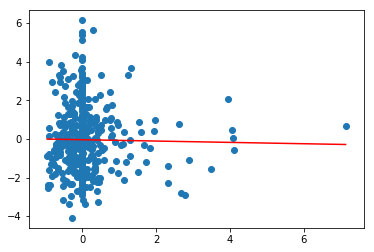

NumberChallenges


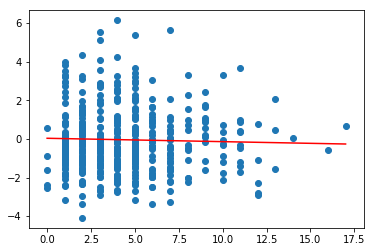

NumberPlatforms


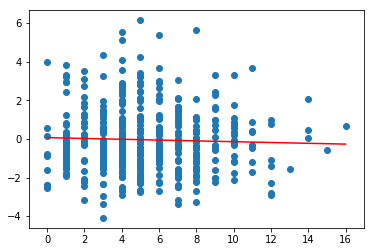

Hardware Types Used


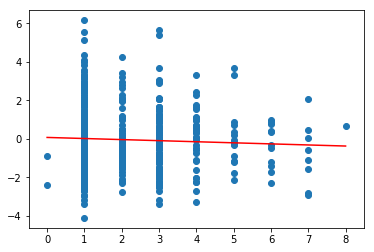

Number of Algorithms


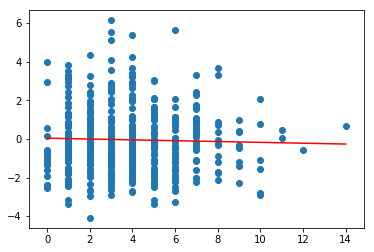

In [25]:
j=221


for i in range(0,len(coef_dict)):
    fig, ax = plt.subplots()
    temp = X_test[list(coef_dict)[i]]
    x = temp.sort_values()
    #print(len(temp.sort_values))
    y=error2
    fit = np.polyfit(x, y, deg=1)
    ax.plot(x, fit[0] * x + fit[1], color='red')
    ax.scatter(x, y)
    print(list(coef_dict)[i])
    plt.show()


In [26]:
feature_importance = est.feature_importances_
feature_length = feature_importance.shape[0]
feature_10 = feature_length-20
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)



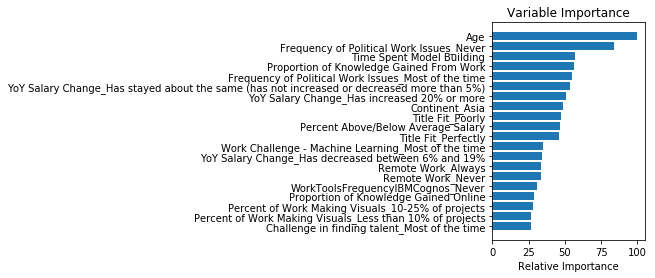

In [27]:
# Plot top 10 features based on importance
feature_importance = est.feature_importances_
feature_length = feature_importance.shape[0]
feature_10 = feature_length-20
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
#sorted_idx=sorted_idx[0:10]
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos[feature_10:feature_length], feature_importance[sorted_idx][feature_10:feature_length], align='center')
plt.yticks(pos[feature_10:feature_length], np.array(list(X_train))[sorted_idx][feature_10:feature_length])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [28]:
df.groupby(featuredict['WorkChallengeFrequencyPolitics'])[featuredict['JobSatisfaction']].describe()

,count,mean,std,min,25%,50%,75%,max
Frequency of Political Work Issues,,,,,,,,
Most of the time,462.0,5.402597,2.447327,1.0,4.0,6.0,7.0,10.0
Never,2628.0,7.298706,1.938384,1.0,6.0,8.0,9.0,10.0
Often,691.0,6.415340,2.040814,1.0,5.0,7.0,8.0,10.0
Rarely,59.0,6.830508,2.190517,1.0,5.0,7.0,8.0,10.0
Sometimes,524.0,6.706107,1.943140,1.0,6.0,7.0,8.0,10.0


In [29]:
df.groupby(featuredict['WorkChallengeFrequencyPolitics'])[featuredict['WorkChallengeFrequencyPolitics']].count()/df[featuredict['WorkChallengeFrequencyPolitics']].count()

Frequency of Political Work Issues
Most of the time    0.105866
Never               0.602200
Often               0.158341
Rarely              0.013520
Sometimes           0.120073
Name: Frequency of Political Work Issues, dtype: float64

In [30]:
df['Entire_Population'] = 'Entire Population'
df['Entire Population'] = df['Entire_Population'].astype('object')

#df['Entire_Population'] = pd.Categorical(df['Entire_Population'])
del df['Entire Population']
del df['Entire_Population']

In [31]:
spike_cols = [col for col in df.columns if 'Population' in col]
spike_cols

[]

In [32]:
#del rev['Entire Population']
rev.keys()

dict_keys(['Frequency of Political Work Issues', 'Percent of Work Making Visuals', 'Machine Learning Tool I Plan to Learn Next', 'Time Spent Model Building', 'Number of Algorithms', 'YoY Salary Change', 'YoY Change in Employer Size', 'Percent Above/Below Average Salary', 'Proportion of Knowledge Gained From Work', 'Proportion of Knowledge Gained Online', 'Usefulness of Firm Learning Platform', 'Frequency of Personally Lacking Domain Expertise', 'Challenge in finding talent', 'Work Challenge - Machine Learning', 'Remote Work', 'Age', 'Title Fit', 'Data Scientist Identity', 'Continent', 'Job Satisfaction', 'Algorithm Understanding Level', 'Importance of Attending a University', 'Entire Population'])

In [37]:
featuredict

{'Age': 'Age',
 'AlgorithmUnderstandingLevel': 'Algorithm Understanding Level',
 'Continent': 'Continent',
 'DataScienceIdentitySelect': 'Data Scientist Identity',
 'EmployerSizeChange': 'YoY Change in Employer Size',
 'Entire_Population': 'Entire Population',
 'JobSatisfaction': 'Job Satisfaction',
 'LearningCategoryOnlineCourses': 'Proportion of Knowledge Gained Online',
 'LearningCategoryWork': 'Proportion of Knowledge Gained From Work',
 'LearningPlatformUsefulnessCompany': 'Usefulness of Firm Learning Platform',
 'MLToolNextYearSelect': 'Machine Learning Tool I Plan to Learn Next',
 'Number of Algorithims': 'Number of Algorithms',
 'Percent Above/Below Average Salary': 'Percent Above/Below Average Salary',
 'RemoteWork': 'Remote Work',
 'SalaryChange': 'YoY Salary Change',
 'TimeModelBuilding': 'Time Spent Model Building',
 'TitleFit': 'Title Fit',
 'UniversityImportance': 'Importance of Attending a University',
 'WorkChallengeFrequencyDomainExpertise': 'Frequency of Personally La

In [38]:
del featuredict['Entire_Population']
keepfeaturelist = list(featuredict.values())

WB = WhiteBoxSensitivity(est,
                    model_df=finaldf,
                    ydepend=dependentVar,
                    cat_df=df,
                    groupbyvars=['Continent'],
                    aggregate_func=np.mean,
                    keepfeaturelist=keepfeaturelist,
                    verbose=None,
                     std_num=1, 
                          
                    )


   percentiles  value
0         0.00    0.0
1         0.01    0.0
2         0.10    1.0
3         0.25    2.0
4         0.50    4.0
5         0.75    5.0
6         0.90    7.0
7         1.00   13.0
   percentiles  value
0         0.00    0.0
1         0.01    0.0
2         0.10    1.0
3         0.25    2.0
4         0.50    4.0
5         0.75    5.0
6         0.90    7.0
7         1.00   15.0
   percentiles  value
0         0.00    0.0
1         0.01    0.0
2         0.10    1.0
3         0.25    2.0
4         0.50    3.0
5         0.75    5.0
6         0.90    7.0
7         1.00   13.0
   percentiles  value
0         0.00    0.0
1         0.01    0.0
2         0.10    1.0
3         0.25    2.0
4         0.50    3.0
5         0.75    5.0
6         0.90    7.0
7         1.00   15.0
   percentiles  value
0         0.00    0.0
1         0.01    0.0
2         0.10    0.0
3         0.25    5.0
4         0.50   20.0
5         0.75   30.0
6         0.90   50.0
7         1.00  100.0
   percent

In [ ]:
unwanted_pred_cols = [dependentVar, 'predictedYSmooth']
finaldf.loc[:, list(set(finaldf.columns).difference(set(unwanted_pred_cols)))].shape

In [ ]:
est.predict(finaldf.loc[:, list(set(finaldf.columns).difference(set(unwanted_pred_cols)))])

In [39]:
%%time 
WB.run(output_type='html',
       output_path='ds_output_new.html')

Wall time: 12.6 s


In [ ]:
%%time 
#
for i in range(0,finaldf.loc[:, finaldf.columns != dependentVar].shape[1]):
                  my_plots = plot_partial_dependence(est, features=[i], # column numbers of plots we want to show 
                        X=finaldf.loc[:, finaldf.columns != dependentVar],            # raw predictors data.
                              #feature_names=[finaldf.columns[finaldf.columns != dependentVar][i]],
                                   grid_resolution=100) # number of values to plot on x axis




In [ ]:
finaldf.shape

In [ ]:
plt.close('all')
finaldf[finaldf.columns != dependentVar]

In [ ]:
#seeing if we get a differnet result for a classifier

y_train_binary = np.where(y_train < y_train.mean() , 1, 0)
y_test_binary = np.where(y_test < y_train.mean() , 1, 0)

modelObject = GradientBoostingClassifier(n_estimators=500,   max_features = 'sqrt', learning_rate=.01)
modelObject.fit(X_train,y_train_binary)
y_in_pred = modelObject.predict(X_train)
y_out_pred=modelObject.predict(X_test)
print(accuracy_score(y_train_binary, y_in_pred)) 
print(accuracy_score(y_test_binary, y_out_pred))  

# Plot top 10 feature importance
feature_importance = modelObject.feature_importances_
feature_length = feature_importance.shape[0]
feature_10 = feature_length-15
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
#sorted_idx=sorted_idx[0:10]
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos[feature_10:feature_length], feature_importance[sorted_idx][feature_10:feature_length], align='center')
plt.yticks(pos[feature_10:feature_length], np.array(list(X_train))[sorted_idx][feature_10:feature_length])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [ ]:
#feature dictionary for when the dependent variable is binary

FeatureDict = {'WorkChallengeFrequencyPolitics' : 'Frequency of Political Work Issues', 
               'WorkChallengeUnusedResults' : 'Frequency of Results Not Being Used', 
               'Number of Algorithims' : 'Number of Algorithims',
               'TitleFit' : 'Goodness of Title Fit',
               'Number of Code Sharing Methods': 'Number of Code Sharing Methods',
               'LearningCategoryOnlineCourses' : 'Share of Learning Done Online', 
               'Continent' : 'Continent',
               'SalaryChange' : 'Salary Change',
               'LearningCategoryWork' : 'Proportion of Knowledge Gained From Work',
               'EmployerSizeChange' : 'Change in Employer Size',
               'WorkChallengeFrequencyTalent' : 'Difficulty Sourcing Talented Colleagues',
               'WorkProductionFrequency' : 'Frequency of Production-style Work',
               'TimeModelBuilding' : 'Proportion of Time Spent Model Building',
               'CompnesationUSD' : 'Compensation ($)',
               'RemoteWork' : 'Frequency of Remote Work',
               'DataScienceIdentitySelect' : 'Views self as Data Scientist',
               'WorkChallengeFrequencyML' : 'Frequency of working with machine learning',
               'UniversityImportance' : 'Importance of a University degree'
              }


In [ ]:
#calls to our new functions for the classifiers go here

#Error plot

#Sensitivty plot
print(sensitivity_plot(X_test.join(y_test),'JobSatisfaction',cont_independentVar,cat_independentVar,
                               Rf,ouputPath,'Data Scienctist Job Satisfaction',['Continent', 'WorkChallengeFrequencyPolitics']))